In [1]:
# Side pursuit - Set up pre-processing first. Start v2 after consulting with the pre-processing framework.
# Setting up MNST, this should look familiar:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.utils import to_categorical

# For examining results
from sklearn.metrics import confusion_matrix
import seaborn as sn

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step


In [2]:
conv_training_data = training_images.reshape(60000, 28, 28, 1)
conv_test_data = test_images.reshape(10000, 28, 28, 1)

In [3]:
def plot_training_history(history, model, eval_images=False):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    if eval_images:
        loss, accuracy  = model.evaluate(conv_test_data, test_labels, verbose=False)
    else:
        loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
        
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

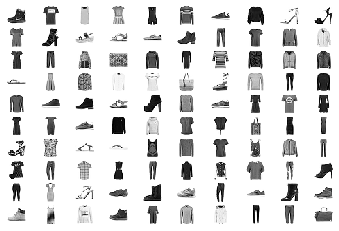

In [4]:
# Lets visualize the first 100 images from the dataset
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(training_images[i], cmap='Greys')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 36s 674us/step - loss: 12.8317 - acc: 0.2032 - val_loss: 12.9724 - val_acc: 0.1952
Epoch 2/5
54000/54000 [==============================] - 35s 651us/step - loss: 12.9391 - acc: 0.1972 - val_loss: 12.9106 - val_acc: 0.1990
Epoch 3/5
54000/54000 [==============================] - 35s 655us/step - loss: 12.9275 - acc: 0.1979 - val_loss: 12.9106 - val_acc: 0.1990
Epoch 4/5
54000/54000 [==============================] - 36s 660us/step - loss: 14.3001 - acc: 0.1128 - val_loss: 14.5305 - val_acc: 0.0985
Epoch 5/5
54000/54000 [==============================] - 36s 660us/step - loss: 14.5036 - acc: 0.1002 - val_loss: 14.5305 - val_acc: 0.0985


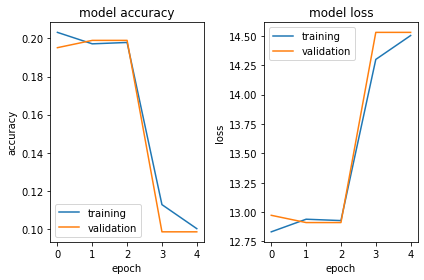

Test loss: 14.5
Test accuracy: 0.1


In [5]:
# Lets make a few small changes and see what happens...
model = Sequential()

# Note, fewer filters and a bigger kernel, plus a pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Note, more filters and a pooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 34s 627us/step - loss: 6.9693 - acc: 0.4869 - val_loss: 0.3950 - val_acc: 0.8485
Epoch 2/5
54000/54000 [==============================] - 35s 647us/step - loss: 0.3584 - acc: 0.8679 - val_loss: 0.3166 - val_acc: 0.8845
Epoch 3/5
54000/54000 [==============================] - 35s 641us/step - loss: 0.2927 - acc: 0.8897 - val_loss: 0.3061 - val_acc: 0.8880
Epoch 4/5
54000/54000 [==============================] - 34s 639us/step - loss: 0.2580 - acc: 0.9024 - val_loss: 0.2739 - val_acc: 0.8937
Epoch 5/5
54000/54000 [==============================] - 35s 642us/step - loss: 0.2301 - acc: 0.9119 - val_loss: 0.2778 - val_acc: 0.8970


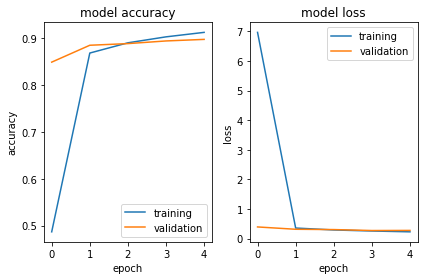

Test loss: 0.309
Test accuracy: 0.891


In [6]:
# Lets make a few small changes and see what happens...
model = Sequential()

# Note, fewer filters and a bigger kernel, plus a pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Note, more filters and a pooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 36s 659us/step - loss: 1.5364 - acc: 0.7730 - val_loss: 0.3343 - val_acc: 0.8750
Epoch 2/5
54000/54000 [==============================] - 36s 667us/step - loss: 0.3221 - acc: 0.8824 - val_loss: 0.3087 - val_acc: 0.8875
Epoch 3/5
54000/54000 [==============================] - 36s 673us/step - loss: 0.2771 - acc: 0.8971 - val_loss: 0.2788 - val_acc: 0.8955
Epoch 4/5
54000/54000 [==============================] - 36s 668us/step - loss: 0.2498 - acc: 0.9078 - val_loss: 0.2735 - val_acc: 0.9035
Epoch 5/5
54000/54000 [==============================] - 37s 681us/step - loss: 0.2245 - acc: 0.9159 - val_loss: 0.2598 - val_acc: 0.9040


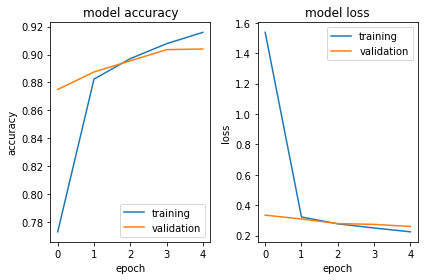

Test loss: 0.278
Test accuracy: 0.903


In [7]:
# Added second ANN layer,decrease 1st layer drop rate to .015
model = Sequential()

# Note, fewer filters and a bigger kernel, plus a pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Note, more filters and a pooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2 dense layers with dropout before the final.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(126, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 35s 655us/step - loss: 0.7895 - acc: 0.7774 - val_loss: 0.3319 - val_acc: 0.8798
Epoch 2/5
54000/54000 [==============================] - 34s 634us/step - loss: 0.3627 - acc: 0.8757 - val_loss: 0.2878 - val_acc: 0.8938
Epoch 3/5
54000/54000 [==============================] - 34s 634us/step - loss: 0.3010 - acc: 0.8946 - val_loss: 0.2852 - val_acc: 0.8928
Epoch 4/5
54000/54000 [==============================] - 34s 637us/step - loss: 0.2716 - acc: 0.9031 - val_loss: 0.2563 - val_acc: 0.9077
Epoch 5/5
54000/54000 [==============================] - 35s 640us/step - loss: 0.2401 - acc: 0.9139 - val_loss: 0.2618 - val_acc: 0.9023


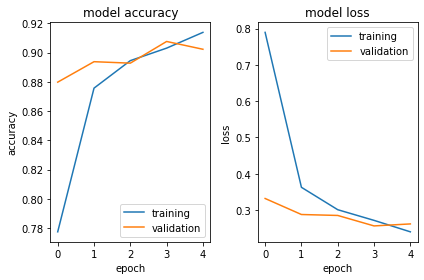

Test loss: 0.28
Test accuracy: 0.903


In [9]:
# Added third layer to ANN head
model = Sequential()

# Note, fewer filters and a bigger kernel, plus a pooling layer
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Note, more filters and a pooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3 dense layers with dropout before the final.
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(126, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(conv_training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

plot_training_history(history, model, eval_images=True)

In [1]:
predictions = model.predict(conv_test_data)
cm = confusion_matrix(np.argmax(predictions, axis=1), np.argmax(test_labels, axis=1))
plt.figure(figsize = (15, 15))

sn.heatmap(cm, annot=True, xticklabels=name_labels, yticklabels=name_labels)
plt.show()

NameError: name 'model' is not defined